In [1]:
!pip install mxnet                      > /dev/null
!pip install gluonnlp pandas tqdm       > /dev/null
!pip install sentencepiece              > /dev/null
!pip install transformers==3            > /dev/null

!pip install torch         

In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master    > /dev/null


In [9]:
!tensorboard --logdir=runs

[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given


2021-10-28 00:44:24.773243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 00:44:25.005329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-28 00:44:25.006380: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.6.0 at http://localhost:6006/ (Press CTRL

[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99]

In [4]:
import visdom
import numpy as np
import torch
vis = visdom.Visdom()
plot = vis.line(Y=torch.randn(5),X=np.array([0,1,2,3,4]))

Setting up a new session...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py", line 1281, in request
    self._send_request(method, url, body

Exception in user code:
------------------------------------------------------------


[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
Visdom python client failed to establish socket to get messages from the server. This feature is optional and can be disabled by initializing Visdom with `use_incoming_socket=False`, which will prevent waiting for this request to timeout.


Exception in user code:
------------------------------------------------------------


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py", line 1281, in request
    self._send_request(method, url, body, headers, encode_chunked)
 

In [ ]:
import random
import numpy as np
import pandas as pd
import re

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp

from tqdm.notebook import tqdm

In [ ]:
seed = 2021

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)  # Set random seed for all devices
torch.cuda.manual_seed_all(seed)  # Set random seed for all GPUs. If there is no GPU, it will be ignored by de

In [ ]:
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

In [ ]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
# GPU 사용 시
device = torch.device("cuda:0")

In [ ]:
bertmodel, vocab = get_pytorch_kobert_model()

using cached model
using cached model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/data/pjt2

/content/drive/MyDrive/data/pjt2


In [ ]:
df = pd.read_csv('data/데이터_추가2_전처리(불용어추가).csv')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,title,topic_idx,data,new_title,new_title1,new_title2,new_title3
0,0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,인천→핀란드 항공기 결항…휴가철 여행객 분통,인천 핀란드 항공기 결항 휴가 철 여행객 분통,인천 핀란드 항공기 결항 휴가 철 여행객 분통,인천 핀란드 항공기 결항 휴가 철 여행객 분통,인천 핀란드 항공기 결항 휴가 여행객 분통
1,1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,실리콘밸리 넘어서겠다…구글 15조원 들여 미국 전역 거점화,실리콘밸리 넘어서다 구글 조원 들이다 미국 전역 거점,실리콘밸리 넘어서다 구글 조원 들이다 미국 전역 거점 화,실리콘밸리 넘어서다 구글 조원 들이다 미국 전역 거점,실리콘밸리 넘어서다 구글 조원 들이다 미국 전역 거점


In [ ]:
df = df[['new_title', 'topic_idx']]

train_df = df.sample(frac=0.8, random_state=2021)
val_df = df.drop(train_df.index)

train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)

train_df.shape, val_df.shape

((42722, 2), (10681, 2))

In [ ]:
dataset_val = []
for sen, label in zip(val_df['new_title'], val_df['topic_idx']):
  data_train = []
  data_train.append(sen)
  data_train.append(str(label))

  dataset_val.append(data_train)
# kobert 트레인 할때 input 방식

In [ ]:
dataset_train = []
for sen, label in zip(train_df['new_title'], train_df['topic_idx']):
  data_train = []
  data_train.append(sen)
  data_train.append(str(label))

  dataset_train.append(data_train)

In [ ]:
dataset_train[0], dataset_val[-1]

(['마트 산업 노동조합 손잡이 명절 선물 상자 공개', '2'], ['박근혜 대통령 내달 방한 장관 이집트 대통령 정상 회의', '6'])

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model


In [ ]:
max_len = 64               
batch_size = 64
warmup_ratio = 0.1
num_epochs = 3               
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
data_train = BERTDataset(dataset=dataset_train, sent_idx=0, label_idx=1, bert_tokenizer=tok, max_len=max_len, pad=True, pair=False)
data_val = BERTDataset(dataset=dataset_val, sent_idx=0, label_idx=1, bert_tokenizer=tok, max_len=max_len, pad=True, pair=False)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=7,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [ ]:
# Prepare optimizer and schedule (linear warmup and decay)
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [ ]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [ ]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [ ]:
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [ ]:
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train accuracy {}".format(e+1, train_acc / (batch_id+1)))

    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} validation accuracy {}".format(e+1, val_acc / (batch_id+1)))
    print()

  0%|          | 0/668 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 2.0474512577056885 train acc 0.140625
epoch 1 batch id 201 loss 0.42429909110069275 train acc 0.6243003731343284
epoch 1 batch id 401 loss 0.5781412124633789 train acc 0.7458307356608479
epoch 1 batch id 601 loss 0.41032344102859497 train acc 0.7890495008319468
epoch 1 train accuracy 0.798455937389926


  0%|          | 0/167 [00:00<?, ?it/s]

epoch 1 validation accuracy 0.8892100667086879



  0%|          | 0/668 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.6149939298629761 train acc 0.796875
epoch 2 batch id 201 loss 0.2160583883523941 train acc 0.8938899253731343
epoch 2 batch id 401 loss 0.39383673667907715 train acc 0.9043796758104738
epoch 2 batch id 601 loss 0.26651057600975037 train acc 0.9099937603993344
epoch 2 train accuracy 0.9115651968122579


  0%|          | 0/167 [00:00<?, ?it/s]

epoch 2 validation accuracy 0.8989406056308435



  0%|          | 0/668 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.35552504658699036 train acc 0.921875
epoch 3 batch id 201 loss 0.15684178471565247 train acc 0.9350124378109452
epoch 3 batch id 401 loss 0.24527396261692047 train acc 0.9414744389027432
epoch 3 batch id 601 loss 0.18246470391750336 train acc 0.9441815723793677
epoch 3 train accuracy 0.9445433581366679


  0%|          | 0/167 [00:00<?, ?it/s]

epoch 3 validation accuracy 0.901279677487131



[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given


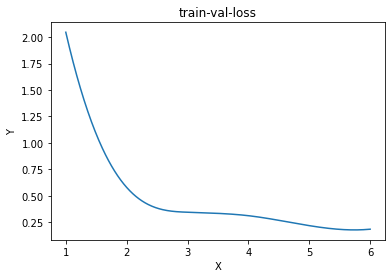

In [30]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 

x=np.array([1,2,3,4,5,6])
y=np.array([2.0474512577056885 ,0.5781412124633789 ,0.3429909110069275 ,0.31032344102859497,0.2160583883523941 ,0.18246470391750336 ])
model=make_interp_spline(x, y)

xs=np.linspace(1,6,500)
ys=model(xs)

plt.plot(xs, ys)
plt.title("train-val-loss")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def predict(sentence):
  data = [sentence, '0']
  dataset_another = [data]
  logits = 0
  another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
  test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
  
  model.eval()

  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
      token_ids = token_ids.long().to(device)
      segment_ids = segment_ids.long().to(device)

      valid_length= valid_length
      label = label.long().to(device)

      out = model(token_ids, valid_length, segment_ids)

      for i in out:
        logits = i
        logits = logits.detach().cpu().numpy()
        logits = np.argmax(logits)

  return logits

using cached model


In [ ]:
#test_df = pd.read_csv('data/test데이터_전처리.csv')
#sub_df = pd.read_csv('sample_submission.csv')

In [ ]:
#pre = []

#for i in tqdm(test_df['title']):
#  pre.append(predict(i))

In [ ]:
#sub_df['topic_idx'] = pre
#sub_df.to_csv('데이터추가2_title컬럼.csv', index=False)